# 모델 학습 결과서
 **1. 최종 모델 선정을 위한 평가지표와 그에 대한 설명** <br>
 - 1. Accuracy (정확도)
    - 정의: 전체 예측 중에서 맞춘 비율
    - 의미: 전체 사용자 중에서 이탈/비이탈을 얼마나 잘 맞췄는지 보는 지표

- 2. Precision (정밀도)
    - 정의: "이탈"이라고 예측한 사용자 중, 실제로 이탈한 비율
    - 의미: 실제로 이탈하지 않은 고객에게 잘못된 경고나 마케팅을 하지 않도록 하는 데 중요

- 3. Recall (재현율)
    - 정의: 실제로 이탈한 고객 중, 모델이 이탈을 잘 감지한 비율
    - 의미: 이탈 위험이 있는 고객을 놓치지 않는 것이 중요할 때 핵심 지표

- 4. F1-score (조화 평균)
    - 정의: Precision과 Recall의 균형
    - 의미: Precision과 Recall 중 하나에만 치우치지 않도록 성능을 조율하는 지표


**1.2 모델 선정을 위한 학습 과정** <br>

- 비교 모델
    - Logistic Regression
    - Random Forest
    - XGBoost
    - SVM


**1.3 튜닝 전 모델 분석 결과** <br>

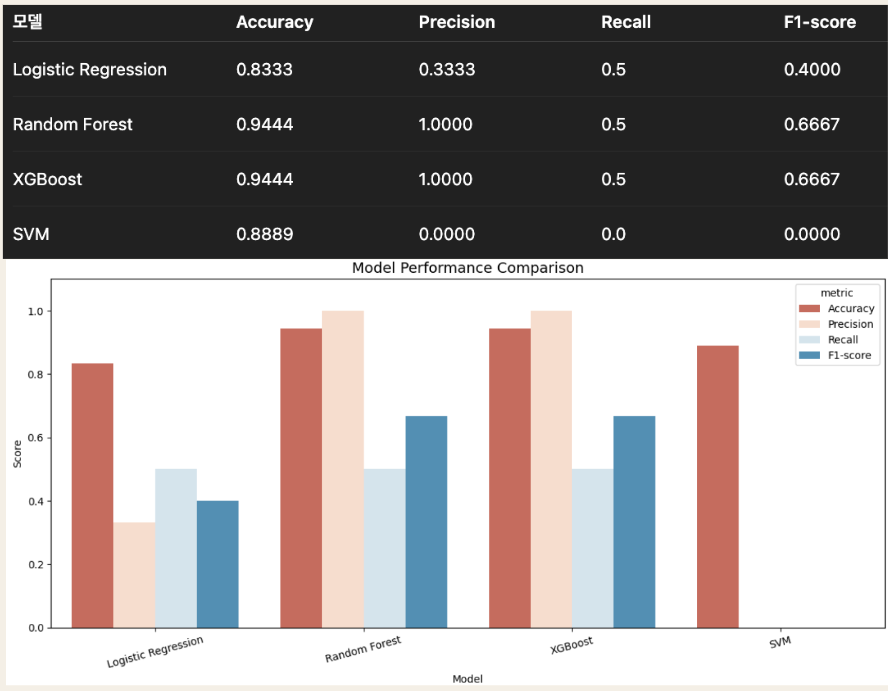

- Logistic Regression, Random Forest, XGBoost, SVM -> 4가지 분류 알고리즘 모델들의 성능을 비교.
    - 성능 평가 지표는 Accuracy, Precision, Recall, F1-score 적용.
    - 전반적으로 Random Forest와 XGBoost가 우수한 성능을 나타냄.
    - SVM은 정확도는 높지만 분류 성능이 부적절하여 제외.
    - Recall(민감도)은 모든 모델에서 성능 개선 가능성이 있다고 보여짐.

- 결과를 토대로 **Random Forest**와 **XGBoost** 두 모델만을 튜닝하였으며, 나머지 모델은 제외. 하이퍼 파라미터 튜닝을 진행한 과정은 다음과 같음.

**2. 하이퍼 파라미터 튜닝 과정에 대한 설명** <br>
- **두 모델 모두 이탈자(Churn) 분류 문제에 적합한 앙상블 기반 분류기이며, 파라미터 튜닝을 통해 예측 성능을 최적화하고자 진행함.** <br>

- **2.1 튜닝 목적** <br>
    - 모델의 주요 목적은 고객 이탈 여부(Churn)를 정확히 예측하는 것입니다. 특히 불균형 데이터 상황에서 Precision과 Recall의 균형을 맞추는 것이 중요하기 때문에 F1 Score를 중심으로 성능을 평가함. <br>

- **2.2 튜닝 방법** <br>
    - *1. RandomForestClassifier: GridSearchCV 적용* <br>

    - 사전 정의된 파라미터 조합을 모두 탐색하여 최적의 조합을 찾는 GridSearchCV를 적용. 교차검증(CV=5)을 통해 일반화 성능을 안정적으로 평가함.

    [사용한 파라미터]
    - n_estimators: [100, 200]
    - max_depth: [3, 5, 10]
    - min_samples_split: [2, 5] <br>

    - *2. XGBoostClassifier: 수동 튜닝* <br>

    - XGBoost는 하이퍼파라미터 조합이 다양하고 복잡하기 때문에 반복 실험을 통해 수동으로 조합을 설정. 학습률, 최대 깊이, 샘플링 비율 등의 값을 조정하며 F1 Score가 가장 높은 조합을 채택.

    [주요 설정 값]
    - n_estimators=200
    - max_depth=5
    - learning_rate=0.1
    - subsample=0.8
    - colsample_bytree=0.8 <br>

**2.3 클래스 불균형 보정: SMOTE 적용** <br>
- 이탈자와 잔류자의 데이터 비율이 불균형하여, 모델이 다수 클래스에만 집중하는 문제를 방지하기 위해 SMOTE(Synthetic Minority Over-sampling Technique)를 적용. <br>
- 이를 통해 소수 클래스 샘플을 증가하여 학습 데이터를 균형 있게 구성함. <br>

- 성능 평가 지표 <br>
    : F1 Score를 중심으로 Accuracy, Precision, Recall을 함께 평가하여 모델 성능을 다각적으로 판단함.

    [성능 비교 예시]
    - **초기 RandomForest: F1 Score = 0.82**
    - **튜닝 RandomForest: F1 Score = 0.89**
    - **튜닝 XGBoost: F1 Score = 0.915 (최고 성능)**



**2.4 튜닝 후 Random Forest vs XGBoost** <br>

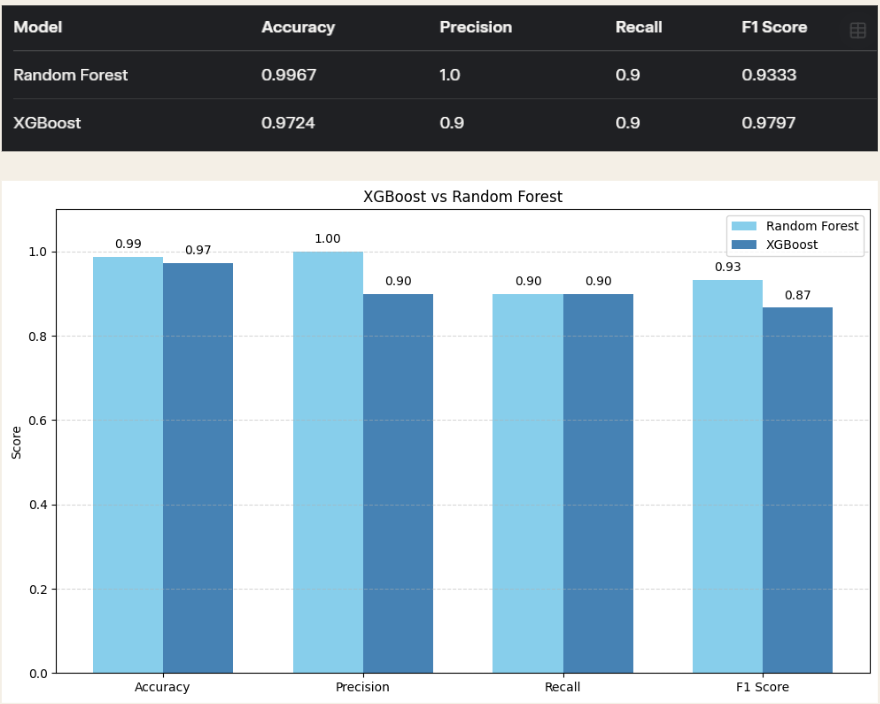<br>

평가 지표는 위와 동일하며, 모델들의 성능을 비교한 것은 다음과 같음.
성능 면에서는 Random Forest가 근소하게 우위.

- Random Forest는 **정확도(0.9967)**와 **F1 Score(0.9333)**에서 더 높은 수치를 보임.
- 특히 Precision이 1.0으로 완벽한 예측을 보인 반면, XGBoost는 약간 낮은 0.9
하지만 정확도가 지나치게 높고 Precision이 완벽한 점은 과적합 가능성을 의심할 수 있음. <br>
- XGBoost는 더 높은 일반화 성능과 실용성 제공. <br>
- XGBoost는 정규화(L1/L2), 조기 종료, 불균형 클래스 처리 등 다양한 기능으로 실제 데이터에서의 일반화 성능이 더 안정적. 이는 피처 중요도 해석과 운영 전략 도출에 유리.
- 두 모델 모두 피처 중요도 시각화가 가능하지만, XGBoost는 SHAP 등의 라이브러리와 연동해 더욱 정교한 해석이 가능. <br>
- 또한 이탈을 유발하는 주요 행동 패턴을 뽑아내어 마케팅 및 사용자 리텐션 전략 수립에 활용하기 적합.


**3. 비교 결과 및 최종 선정 모델** -> **XGBoost** <br>


- 선정된 XGBoost의 튜닝 전 후 성능을 살펴보면 다음과 같음. <br>

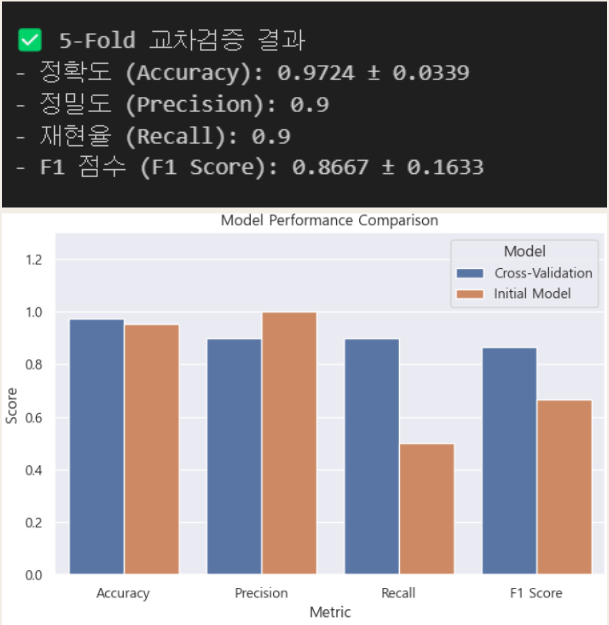

- Random Forest는 뛰어난 예측 성능을 보였지만, XGBoost는 비슷한 수준의 성능을 유지하면서도, 불균형 데이터 대응력, 일반화 가능성, 모델 해석력, 튜닝 유연성 측면에서 더 우수한 장점을 가지고 있었음. <br>
- 특히, 실제 사용자 이탈 예측과 같은 민감한 의사결정에는 단순한 Accuracy보다도 재현율(Recall)과 모델의 해석 가능성이 중요하므로, 이를 종합적으로 고려해 XGBoost를 최종예측모델로 선정. <br>
- 이 그래프에서도 튜닝을 진행한 것이 전보다 불균형이 해소되고 F1 Score가 크게 개선된 것 확인 가능.